<h1>Clustering </h1>
    <h3>k-means++:</h3> 
k-means++ is a means of dividing a dataset into k clusters.  It starts by selecting one data point and then find the centres based on the squared distance. It can find additional groups. It is used for segmenting markets and astronomy 
    The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. It was first used by James MacQueen in 1967 in "Some methods for classification and analysis of multivariate observations"

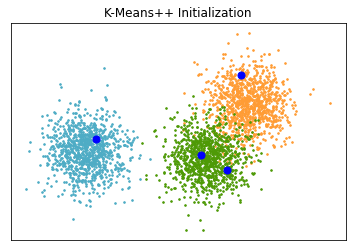

In [3]:
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# create sample data, large 
no_samples = 3000
no_components = 3
k_clusters = 4


# returns a data sets  where the data sample set is centered around a number of conponents 
# increase the standard deviation of the cluster, will make less of the cluster. 
X, y_true = make_blobs(
    n_samples=no_samples, centers=no_components, cluster_std=1.0, random_state=2
)
X = X[:, ::-1]

# divides the dataset (X) into k_clusters by picking a random starting point kmeans++
# we are looking for k_clusters which is set one larger than no of component to see if extra center appears
# we can change random_state to any integer to see whta happens 
# returns the centers
centers_init, indices = kmeans_plusplus(X, n_clusters=k_clusters, random_state=3)

# Plot init seeds along side sample data
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)

# Plot the centers 
plt.scatter(centers_init[:, 0], centers_init[:, 1], c="b", s=50)
plt.title("K-Means++ Initialization")
plt.xticks([])
plt.yticks([])
plt.show()

<h1>Feature Selection</h1>
<h3>Model-based and sequential feature</h3>
SelectFromModel which is based on feature importance.
Feature selection is a technique where we choose those features in our data that contribute most to the target variable. Hightlights what factors are high related /influnce the observed outcome. (in this diabewtes)  
Note when the number of alphas is 7 as oppose to 6  bmi (body mass index) has more of a influence in triggering diabetes than bmi     body mass index than s1 (total serum cholesterol)  

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

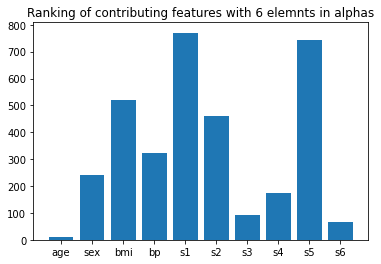

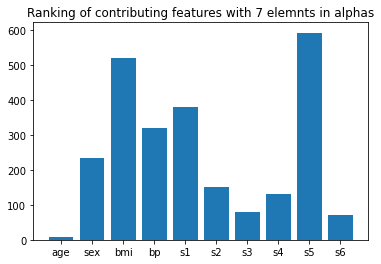

In [5]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
# Ten baseline variables, age, sex, body mass index, average blood pressure, 
# and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, 
# a quantitative measure of disease progression one year after baseline.
# Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).

# load the dataset 
diabetes = load_diabetes()
print(diabetes.DESCR)
print()
print()

X, y = diabetes.data, diabetes.target
# chaging num to 7 will change features importance below i.e bmi becomes more inpoirtance 
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=6)).fit(X, y)

importance = np.abs(ridge.coef_)
feature_names = np.array(diabetes.feature_names)
plt.bar(height=importance, x=feature_names)
plt.title("Ranking of contributing features with 6 elemnts in alphas")
plt.show()

#second greaph num is 7 (array of 7) bmi is now more important  
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=7)).fit(X, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(diabetes.feature_names)
plt.bar(height=importance, x=feature_names)
plt.title("Ranking of contributing features with 7 elemnts in alphas")
plt.show()